/tmp/ipython-input-2496279678.py:12: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/creditcard.csv")


Original Dataset Shape: (136742, 31)

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

Dataset Shape After Dropping NaN: (136741, 31)

Class Distribution:
Class
0.0    136478
1.0       263
Name: count, dtype: int64

After SMOTE Class Distribution:
Class
0.0    136478
1.0    136478
Name: count, dtype: int64

Confusion Matrix:
[[26534   660]
 [ 1776 25622]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     27194
         1.0       0.97      0.94      0.95     27398

    accuracy                           0.96     54592
   macro avg       0.96      0.96      0.96    

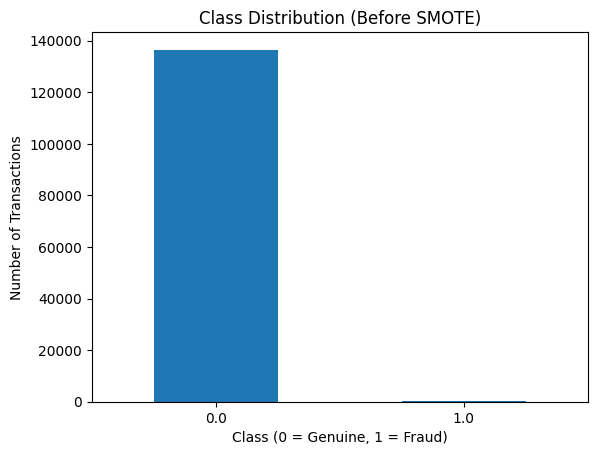

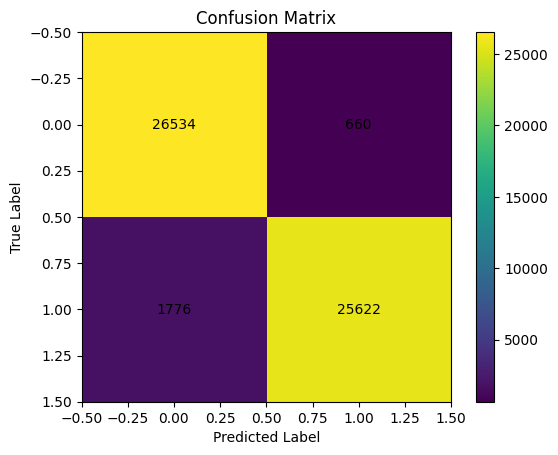

In [6]:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE


data = pd.read_csv("/content/creditcard.csv")

print("Original Dataset Shape:", data.shape)


print("\nMissing Values:")
print(data.isnull().sum())


data = data.dropna()

print("\nDataset Shape After Dropping NaN:", data.shape)


print("\nClass Distribution:")
print(data['Class'].value_counts())

X = data.drop('Class', axis=1)
y = data['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE Class Distribution:")
print(pd.Series(y_resampled).value_counts())


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
import matplotlib.pyplot as plt


data['Class'].value_counts().plot(kind='bar')
plt.title("Class Distribution (Before SMOTE)")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.show()

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()


